<a href="https://colab.research.google.com/github/junwzm/study/blob/master/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

import sklearn as sk



In [26]:
import tensorflow as tf
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()
print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [22]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# 随机选取6个图片
for i in range(0,6):
    random_num = np.random.randint(0, len(x_train))
    img = x_train[random_num]
    cv2_imshow(img)
    cv2.waitKey(0)
    print(img.shape)

cv2.destroyAllWindows() 

(28, 28, 1)


(28, 28, 1)


(28, 28, 1)


(28, 28, 1)


(28, 28, 1)


(28, 28, 1)


In [10]:
print("训练集数据维度", str(x_train.shape))

print ("训练集feature数据量大小: " + str(len(x_train)))
print ("训练集label数据量大小: " + str(len(y_train)))
print ("测试集feature数据量大小: " + str(len(x_test)))
print ("测试集label数据量大小: " + str(len(y_test)))
print()
print ("训练集一条数据的维度:" + str(x_train[0].shape))
print ("训练集label的维度:" + str(y_train.shape))
print()
print ("测试集一条数据的维度:" + str(x_test[0].shape))
print ("测试集label的形状:" + str(y_test.shape))

训练集数据维度 (60000, 28, 28)
训练集feature数据量大小: 60000
训练集label数据量大小: 60000
测试集feature数据量大小: 10000
测试集label数据量大小: 10000

训练集一条数据的维度:(28, 28)
训练集label的维度:(60000,)

测试集一条数据的维度:(28, 28)
测试集label的形状:(10000,)


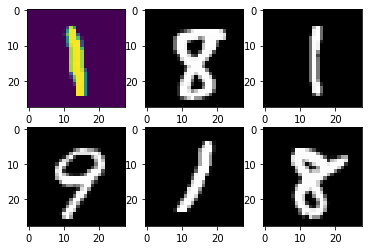

In [17]:
# 导包
import matplotlib.pyplot as plt

# 2行3列 
# cmap=plt.get_cmap('gray') 制定数据显示为灰度显示
plt.subplot(231)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num])

plt.subplot(232)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num] , cmap=plt.get_cmap('gray'))

plt.subplot(233)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num] , cmap=plt.get_cmap('gray'))

plt.subplot(234)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num] , cmap=plt.get_cmap('gray'))

plt.subplot(235)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num] , cmap=plt.get_cmap('gray'))

plt.subplot(236)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray')) 

# 展示数据 
plt.show()

In [27]:
# tensorflow处理数据格式是4个维度， 彩色图（60000,28,28,3） 灰度图（60000,28,28,1）
# 原始数据（60000,28,28） --> （60000,28,28,1）
# 分别把测试集和训练集的数据都变成4维
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)


# 默认图片数据类型是int，把数据类型转化成float类型方便除法
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# 数据归一化 从(0 to 255) --> (0 to 1)
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], '训练集数量')
print(x_test.shape[0], '测试集数量')

x_train shape: (60000, 28, 28, 1)
60000 训练集数量
10000 测试集数量


In [28]:
# 利用tf工具类，独热编码
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

# 打印y_train第0个元素查看内容

print(y_train[1])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD 

# create model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
#10种输出
model.add(Dense(10, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.01),
              metrics = ['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

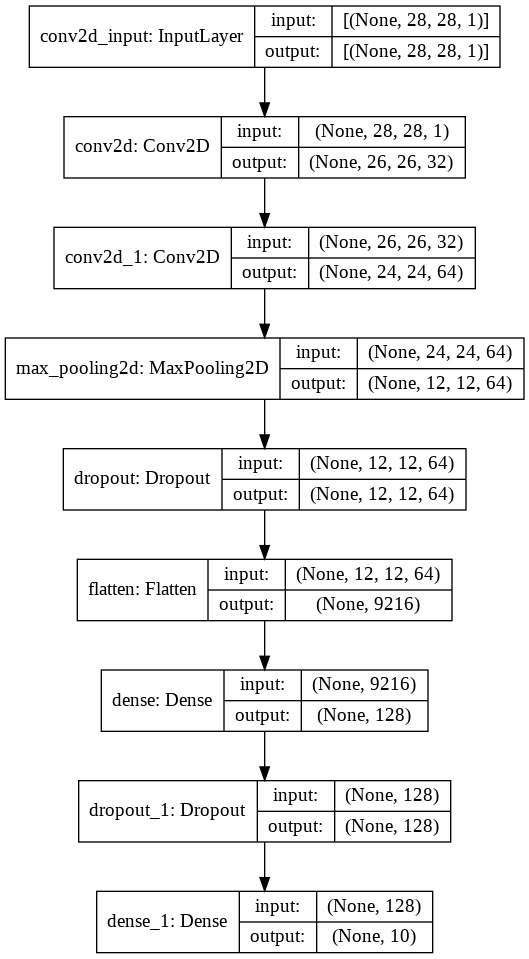

In [30]:
#linux   下sudo apt-get install graphviz
#windows 下安装 graphviz 添加环境变量
#pip install graphviz
#https://blog.csdn.net/Snowy_susu/article/details/90439423

# 模型可视化图像保存路径
model_diagrams_path = './'

# 生成模型描述图片
tf.keras.utils.plot_model(model, to_file = model_diagrams_path + 'model_plot.png',
           show_shapes = True,
           show_layer_names = True)

In [31]:
#10个epochs
#32的batch大小

history = model.fit(x_train,
                    y_train,
                    batch_size = 64,
                    epochs = 10,
                    verbose = 1,
                    validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
938/938 [==============================] - 38s 5ms/step - loss: 1.2652 - accuracy: 0.5915 - val_loss: 0.2433 - val_accuracy: 0.9278
Epoch 2/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3737 - accuracy: 0.8853 - val_loss: 0.1821 - val_accuracy: 0.9459
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2925 - accuracy: 0.9117 - val_loss: 0.1520 - val_accuracy: 0.9540
Epoch 4/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2573 - accuracy: 0.9226 - val_loss: 0.1302 - val_accuracy: 0.9615
Epoch 5/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2188 - accuracy: 0.9359 - val_loss: 0.1072 - val_accuracy: 0.9664
Epoch 6/10
938/938 [==============================] - 5s 5ms/step - loss: 0.1983 - accuracy: 0.9407 - val_loss: 0.0943 - val_accuracy: 0.9712
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 0.1748 - accuracy: 0.9471 - val_loss: 0.0852 - val_accuracy: 0.9733
Epoch

In [32]:
history.history

{'accuracy': [0.762066662311554,
  0.8941333293914795,
  0.9140999913215637,
  0.9255333542823792,
  0.9366166591644287,
  0.9430833458900452,
  0.9490833282470703,
  0.9548333287239075,
  0.9586166739463806,
  0.9619166851043701],
 'loss': [0.7613411545753479,
  0.34842953085899353,
  0.28601109981536865,
  0.24643108248710632,
  0.2148783653974533,
  0.19000379741191864,
  0.17085398733615875,
  0.1506224423646927,
  0.13679370284080505,
  0.12879280745983124],
 'val_accuracy': [0.9277999997138977,
  0.945900022983551,
  0.9539999961853027,
  0.9614999890327454,
  0.9664000272750854,
  0.9711999893188477,
  0.9732999801635742,
  0.9761000275611877,
  0.9778000116348267,
  0.9789000153541565],
 'val_loss': [0.24331432580947876,
  0.18211178481578827,
  0.15197446942329407,
  0.1301862597465515,
  0.10718782991170883,
  0.09426774084568024,
  0.08517877012491226,
  0.07523016631603241,
  0.06815332174301147,
  0.06320830434560776]}

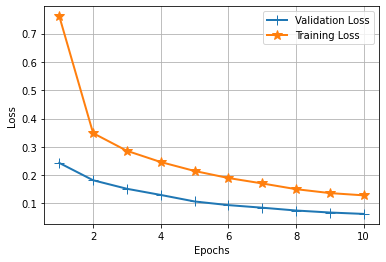

In [33]:
# loss图表
# 通常测试集的数量少
# 所以测试集的loss 小于训练集的loss
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = [1,2,3,4,5,6,7,8,9,10]

line1 = plt.plot(epochs, val_loss_values, label='Validation Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')

plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '*', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

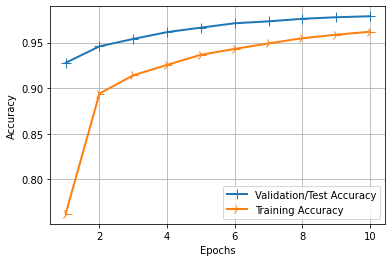

In [34]:
# 精确度图表
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = [1,2,3,4,5,6,7,8,9,10]

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [35]:
model.save("mnist_10_epoch.h5")
print("模型保存成功")

模型保存成功


In [36]:
from tensorflow.keras.models import load_model

classifier = load_model('mnist_10_epoch.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


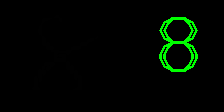

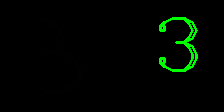

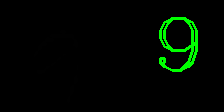

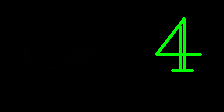

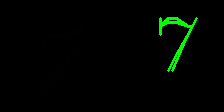

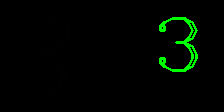

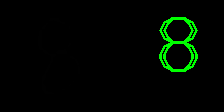

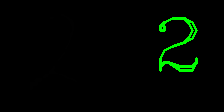

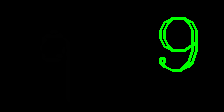

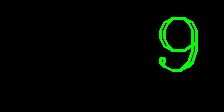

In [38]:
import cv2
import numpy as np


def draw_test(name, pred, input_im):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0] ,cv2.BORDER_CONSTANT,value=BLACK)
    #cv2.imshow("cd", expanded_image)
    #cv2.waitKey(0)
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (152, 70) , cv2.FONT_HERSHEY_COMPLEX_SMALL,4, (0,255,0), 2)
    cv2_imshow(expanded_image)


for i in range(0,10):
    #随机取一个测试集图片
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]

    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC)
    #cv2.imshow("cd", imageL)
    # cv2.waitKey(0)
    input_im = input_im.reshape(1,28,28,1) 
    
    ##使用模型预测
    res = str(classifier.predict_classes(input_im, 1, verbose = 0)[0])

    draw_test("Prediction", res, imageL) 
    cv2.waitKey(0)

cv2.destroyAllWindows()